# Hypothesis Testing

This notebook focuses on testing hypotheses derived from the `Telco Customer Churn` dataset. We will perform statistical tests to validate our observations and determine their significance. Each hypothesis will be tested, the null hypothesis will be evaluated, and business implications will be crafted based on the results.

**By the end of this notebook, we will have validated actionable insights that stakeholders can use to make informed decisions and improve business strategies.**

## Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_telco_churn.csv')

# Hypothesis
#### `If we bundle Fiber-Optic internet service with various add-on solutions for customers on a month-to-month subscription within their first year, then their likelihood of churning will decrease.`

# Statistical Analysis
- We will conduct the statistical `chi-square test` for `InternetService` and the various `Add-ons` to determine if the combination of these `categorical` variables is statistically `significant in reducing churn`.
- We will also conduct a `T-test` to compare the churn rates for customers on a `month-to-month` subscription within their `first year` and those `beyond the first year` to see if the `duration` of the subscription `impacts churn`.

## Observation 1 
### Customers with Internet have high churn and `Fiber-optic` internet leads to churn more so than `DSL`.

### Chi-Squared Test

In [2]:
internet_service = df[df['InternetService'] != 'No']
contingency_table = pd.crosstab(internet_service['InternetService'],internet_service['Churn'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(p_value)
assert p_value < 0.05, 'Failed'

2.2962170975696968e-73


#### Results
We `reject` the `null` hypothesis, meaning the `Churn` rates `truly differ` between `Fiber-optic` and `DSL`. Our `p-value < 0.05`, suggests `InternetService` is statistically significant in affecting `Churn`.

### Business Implications
- We need to investigate the quality and reliability of our Fiber-optic internet service, because it is leading to higher churn rates. Identifying technical issues or service problems will help us understand and address the reasons behind why customers are leaving.
- We need to offer incentives to customers so we can retain them in the interim while we resolve our internet service issues.

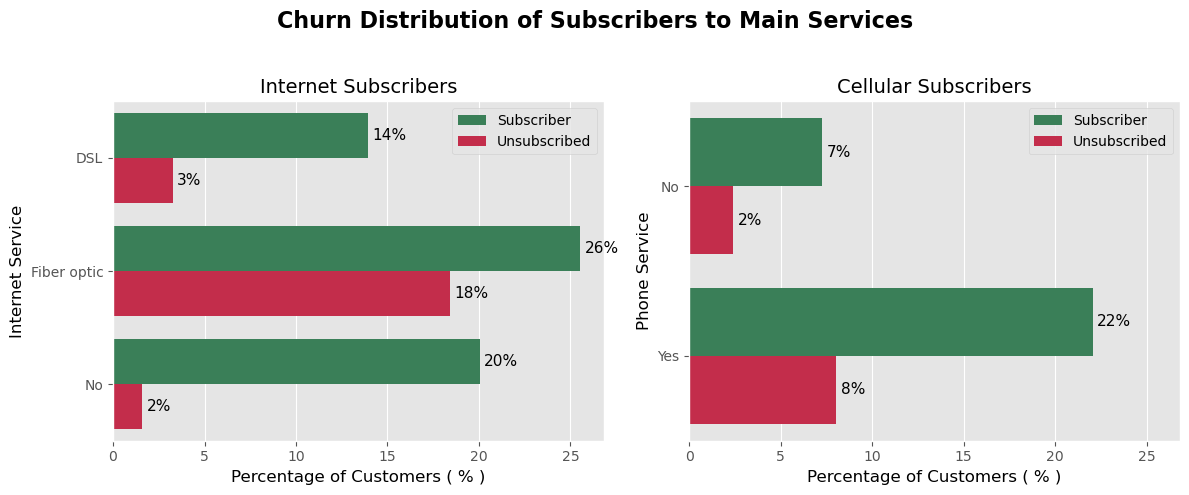

In [3]:
services = df.groupby(['Churn', 'InternetService', 'PhoneService']).size().rename('count').reset_index()
services['percentage'] = (services['count']/services['count'].sum()) * 100

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 5), sharex=True)
sns.barplot(ax=ax1, data=services, x='percentage', y='InternetService', hue='Churn',
            palette={'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}, errorbar=None)
ax1.set_title('Internet Subscribers', color='black', fontsize=14)
ax1.set_xlabel('Percentage of Customers ( % )', color='black')
ax1.set_ylabel('Internet Service', color='black')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper right')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot
for p in ax1.patches:
    if p.get_width() > 0:
        ax1.annotate(format(p.get_width(), '.0f') + '%',
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center',
                     xytext=(3, 0),  # Adjust spacing
                     textcoords='offset points', fontsize=11, color='black')

sns.barplot(ax=ax2, data=services, x='percentage', y='PhoneService', hue='Churn',
            palette={'Subscriber':'seagreen','Unsubscribed':'crimson'}, errorbar=None)
ax2.set_title('Cellular Subscribers', color='black', fontsize=14)
ax2.set_xlabel('Percentage of Customers ( % )', color='black')
ax2.set_ylabel('Phone Service', color='black')
ax2.legend(bbox_to_anchor=(1,1), loc='upper right')

for p in ax2.patches:
    if p.get_width() > 0:
        ax2.annotate(format(p.get_width(), '.0f') + '%',
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center',
                     xytext=(3, 0),  # Adjust spacing
                     textcoords='offset points', fontsize=11, color='black')

plt.suptitle('Churn Distribution of Subscribers to Main Services', fontsize=16, fontweight='bold', color='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_1.png')
plt.show()

## Observation 2
### Customers with `Fiber Optic` internet and add-ons like `OnlineSecurity` and `TechSupport` have lower churn rates compared to those without these add-ons.

### Chi-Squared Test

In [4]:
fiber_optic = df[df['InternetService'] =='Fiber optic']
add_ons = ['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection']
for column in add_ons:
    contingency_table = pd.crosstab(fiber_optic[column],fiber_optic['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f'{column} \n  - p-Value = {p_value}')
    assert p_value < 0.05, 'Failed'

OnlineSecurity 
  - p-Value = 4.046883047145898e-43
TechSupport 
  - p-Value = 1.6726808743988167e-41
OnlineBackup 
  - p-Value = 4.1194070284719136e-30
DeviceProtection 
  - p-Value = 8.96730440877596e-25


#### Results
We `reject` the `null` hypothesis for all `Add-ons`, meaning the `Churn` rates `truly differ` among each of the `various add-ons`. It appers, `OnlineSecurity` and `TechSupport` have a much `lower p-value` compared to the others, indicating stronger evidence for `lower churn`. However, all of our `p-value < 0.05`, suggests that `each of our Add-ons` and `Churn` are statistically `significant` in reducing churn.

### Business Implications
- We have to promote these add-ons, specifically more so Online Security and Tech Support, because they lead to lower churn rates.
- We can bundle these add-ons to customers with fiber-optic internet to help retain them, at least until we resolve our internet reliability.

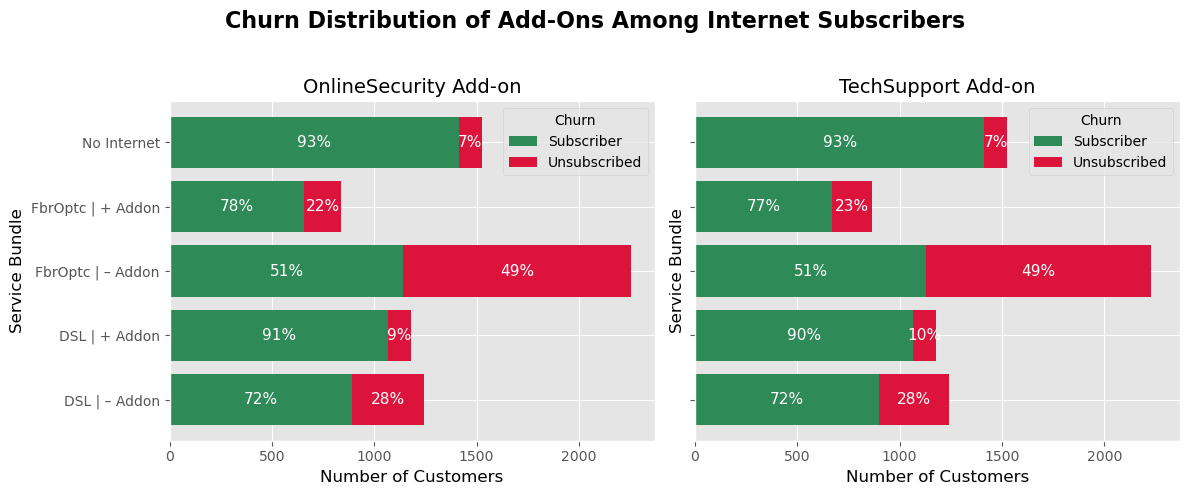

In [5]:
column = 'InternetService'
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
axes = axes.flatten()

for index, add_on in enumerate(['OnlineSecurity', 'TechSupport']):
    ax = axes[index]
    churn_addons = df.groupby([column, add_on, 'Churn']).size().reset_index(name='count')
    total_counts = churn_addons.groupby([column, add_on])['count'].transform('sum')
    churn_addons['percentage'] = (churn_addons['count'] / total_counts) * 100

# for churn_status loop with plot and df_pivot code created by ChatGPT, 
# help with grouping multiple features on 1 x-axis
    pivot_df = churn_addons.pivot_table(index=[column, add_on], columns='Churn', values='count', fill_value=0)
    pivot_df = pivot_df.reset_index()
    colors = {'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}
    
    for churn_status in pivot_df.columns[2:]:
        ax.barh(
            pivot_df.index,
            pivot_df[churn_status],
            left=pivot_df[pivot_df.columns[2:]].cumsum(axis=1)[churn_status] - pivot_df[churn_status],
            label=churn_status,
            color=colors[churn_status])

# for loop below created by ChatGPT, help with putting labels on the barplots
    for i in pivot_df.index:
        left = 0
        for churn_status in pivot_df.columns[2:]:
            width = pivot_df.at[i, churn_status]
            if width > 0:
                percentage = (width / pivot_df.loc[i, pivot_df.columns[2:]].sum()) * 100
                ax.text(left + width / 2, i, f'{percentage:.0f}%', ha='center', va='center', \
                        color='white', fontsize=11)
            left += width

    ax.set_yticks(pivot_df.index)
    ax.set_yticklabels([f'{row[0]} // {row[1]}' for row in pivot_df[[column, add_on]].values], rotation=0)
    ax.set_title(f'{add_on} Add-on', color='black', fontsize=14)
    ax.set_xlabel('Number of Customers', color='black')
    ax.set_ylabel('Service Bundle', color='black')
    ax.legend(title='Churn', bbox_to_anchor=(1, 1), loc='upper right')

plt.yticks([0, 1, 2, 3, 4], ['DSL | – Addon', 'DSL | + Addon', 'FbrOptc | – Addon', 'FbrOptc | + Addon', 'No Internet'])
plt.suptitle('Churn Distribution of Add-Ons Among Internet Subscribers', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_2.png')
plt.show()

## Observation 3
### Customers enrolled in `Fiber optic` internet and `Month-to-month` subscription have high `Churn` within the `first year`.

### Chi-Squared Test

In [6]:
contingency_table = pd.crosstab(fiber_optic['Contract'], fiber_optic['Churn'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2 p-Value: \n  {p_value}')
assert p_value < 0.05, 'Failed'

first_year_fiber_subs = df[(df['Contract'] == 'Month-to-month') & (df['tenure'] <= 12) & (df['InternetService'] == 'Fiber optic')]
other_year_fiber_subs = df[(df['Contract'] == 'Month-to-month') & (df['tenure']  > 12) & (df['InternetService'] == 'Fiber optic')]
first_year_fiber_subs['ChurnEncoded'] = first_year_fiber_subs['Churn'].map({'Subscriber':0, 'Unsubscribed':1})
other_year_fiber_subs['ChurnEncoded'] = other_year_fiber_subs['Churn'].map({'Subscriber':0, 'Unsubscribed':1})

first_year_churn = first_year_fiber_subs['ChurnEncoded']
other_year_churn = other_year_fiber_subs['ChurnEncoded']
t_stat, p_value = stats.ttest_ind(first_year_churn, other_year_churn, equal_var=False)
print(f't_stat: \n  {t_stat}, \np-Value: \n  {p_value}')
assert p_value < 0.05, 'Failed'

chi2 p-Value: 
  6.0153372462392565e-102
t_stat: 
  13.188526818364595, 
p-Value: 
  3.5449581034889565e-38


#### Results
We `reject` the `null` hypothesis, indicating that `churn rates` significantly differ for customers with `Fiber optic` internet on `Month-to-month` subscriptions within their `first year` comapred to other time periods. Our `p-value < 0.05` suggests that the first year of month-to-month subscribers enrolled in fiber-optic services truly impact churn.

### Business Implications
- We can bundle our Fiber-Optic service with add-ons Online Security and Tech Support on a monthly subscription package to reduce churn.
- We must improve customer support and engagement initiatives for first year subscribers to ensure customer satisfaction and reduce early churn.

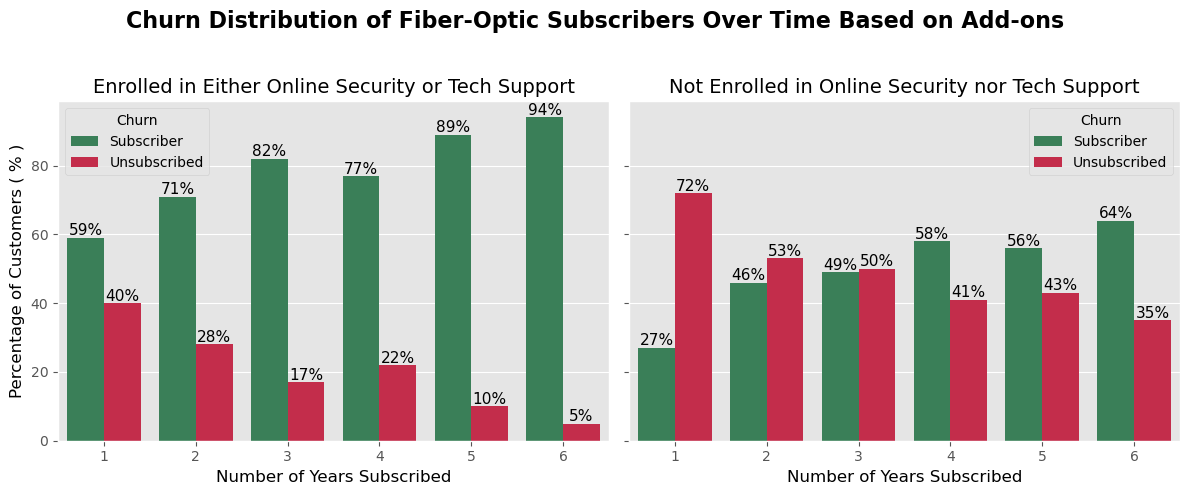

In [7]:
fiber_and_addons = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic') & \
                      (df['OnlineSecurity'] == 'Yes') | (df['TechSupport'] == 'Yes')]
fiber_no_addons = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic') & \
                      (df['OnlineSecurity'] == 'No') & (df['TechSupport'] == 'No')]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)

# Stackoverflow code to create group ranges of numerical data
# https://stackoverflow.com/questions/74212136/pandas-groupby-and-then-pandas-cut-in-python
fiber_and_addons['mon_range'] = pd.cut(fiber_and_addons['tenure'],
                                       bins=[0,12,24,36,48,60,72],
                                       labels=['1','2','3','4','5','6'])
fiber_and_addons = fiber_and_addons.groupby('mon_range')['Churn'].value_counts(normalize=True).reset_index()
fiber_and_addons['percentage'] = (fiber_and_addons['proportion'] * 100).astype(int)

fiber_no_addons['mon_range'] = pd.cut(fiber_no_addons['tenure'],
                                      bins=[0,12,24,36,48,60,72],
                                      labels=['1','2','3','4','5','6'])
fiber_no_addons = fiber_no_addons.groupby('mon_range')['Churn'].value_counts(normalize=True).reset_index()
fiber_no_addons['percentage'] = (fiber_no_addons['proportion'] * 100).astype(int)

sns.barplot(ax=ax1, data=fiber_and_addons, x='mon_range', y='percentage', hue='Churn',
            palette={'Subscriber':'seagreen', 'Unsubscribed':'crimson'},
            hue_order=['Subscriber','Unsubscribed'])
ax1.set_title('Enrolled in Either Online Security or Tech Support', fontsize=14)
ax1.set_xlabel('Number of Years Subscribed', color='black')
ax1.set_ylabel('Percentage of Customers ( % )', color='black')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot
for p in ax1.patches:
    if p.get_width() > 0:
        ax1.annotate(format(p.get_height(), '.0f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5), textcoords = 'offset points', fontsize=11, color='black')

sns.barplot(ax=ax2, data=fiber_no_addons, x='mon_range', y='percentage', hue='Churn',
            palette={'Subscriber':'seagreen', 'Unsubscribed':'crimson'},
            hue_order=['Subscriber','Unsubscribed'])

ax2.set_title('Not Enrolled in Online Security nor Tech Support', fontsize=14)
ax2.set_xlabel('Number of Years Subscribed', color='black')
ax2.set_ylabel('Percentage of Customers ( % )', color='black')

for p in ax2.patches:
    if p.get_width() > 0:
        ax2.annotate(format(p.get_height(), '.0f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5), textcoords = 'offset points', fontsize=11, color='black')

plt.suptitle('Churn Distribution of Fiber-Optic Subscribers Over Time Based on Add-ons', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_3.png')
plt.show()

In [8]:
try:
    print('Script Executed Successfully')
except:
    print('FAILED')

Script Executed Successfully
